En este script analizamos la longitud de los titulares y obtenemos una nube de palabras para los titulares clickbait y no clickbait. Podemos verlo en la subsección 4.1.2.

Primeras filas:
                       url                                              title  \
0  https://t.co/ik70DfHNVe  El secreto mejor guardado de Paula Badosa: "Lo...   
1  https://t.co/QSJEl9GSSD  Aimar Bretos descubre cuándo se jubilan los ju...   
2  https://t.co/jggrhWLEP2  Esta es la causa de más del 80% de los cáncere...   
3  https://t.co/4cOcWdGsSE  Giro de 180º en los cajeros de toda la vida: e...   
4  https://t.co/noMgLDNRaW       Usar las entradas y salidas con menos coste.   

   is_clickbait  
0             1  
1             1  
2             1  
3             1  
4             1  

Distribución de clases (is_clickbait):
is_clickbait
0    400
1    387
Name: count, dtype: int64

Estadísticas por clase:


title_length                                                \
                    count   mean    std   min   25%   50%    75%    max   
No Clickbait        400.0  88.79  26.41  18.0  72.0  90.0  108.0  171.0   
Clickbait           387.0  90.69  42.12   6.0  68.0  91.0  107.0  251.0   

             word_count                                            
                  count   mean   std  min   25%   50%   75%   max  
No Clickbait      400.0  15.18  4.72  3.0  12.0  15.0  19.0  28.0  
Clickbait         387.0  15.99  7.46  1.0  12.0  16.0  19.0  49.0

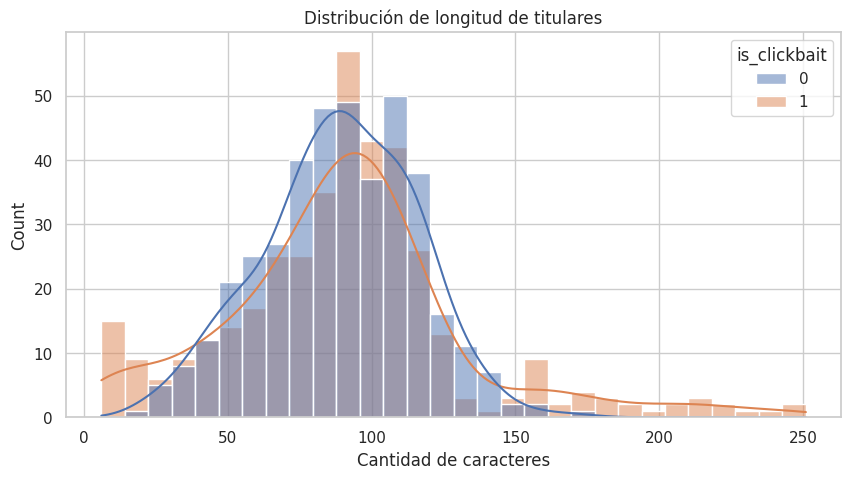

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Top 10 bigramas en títulos clickbait:
[('real madrid', np.int64(13)), ('papa francisco', np.int64(6)), ('según ia', np.int64(5)), ('selección colombia', np.int64(4)), ('león xiv', np.int64(4)), ('tras ser', np.int64(3)), ('quién mejor', np.int64(3)), ('cristiano ronaldo', np.int64(3)), ('luis díaz', np.int64(3)), ('xabi alonso', np.int64(3))]

Top 10 bigramas en títulos no clickbait:
[('fiscal general', np.int64(8)), ('miguel uribe', np.int64(7)), ('uribe turbay', np.int64(7)), ('renta 2024', np.int64(6)), ('flotilla libertad', np.int64(5)), ('declaración renta', np.int64(5)), ('protestas ángeles', np.int64(4)), ('banco españa', np.int64(4)), ('detener gobernador', np.int64(3)), ('gobernador california', np.int64(3))]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


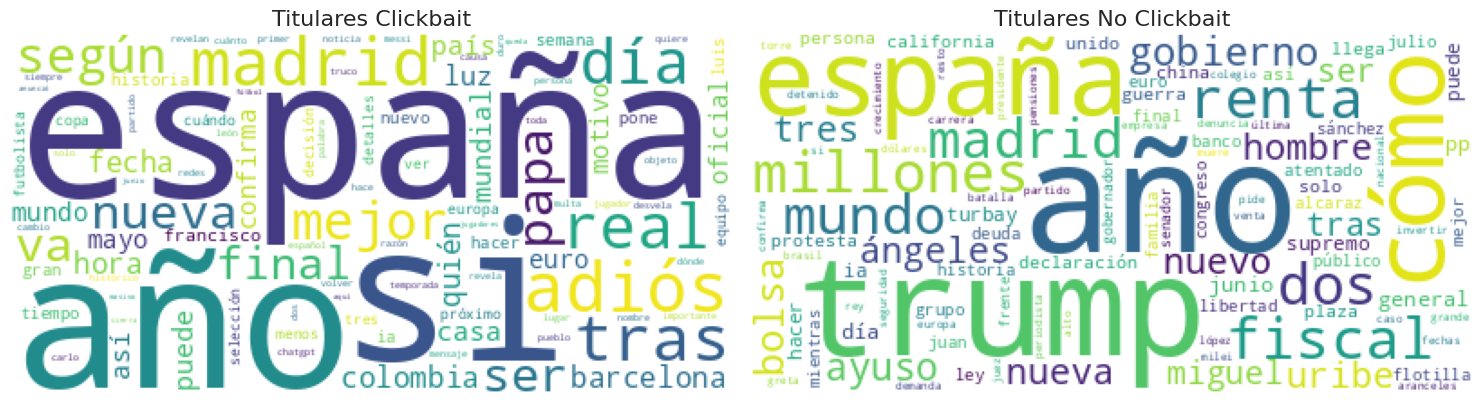

In [1]:
# Carga y unión de datasets
import pandas as pd

df_clickbait = pd.read_csv("dataset_clickbait_clasificacion_limpio.csv")
df_noclickbait = pd.read_csv("dataset_no_clickbait_clasificacion_limpio.csv")

df = pd.concat([df_clickbait, df_noclickbait], ignore_index=True)
df.dropna(subset=['title'], inplace=True)  # Eliminar títulos nulos

print("Primeras filas:")
print(df.head())
print("\nDistribución de clases (is_clickbait):")
print(df['is_clickbait'].value_counts())

# Estadísticas
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['word_count'] = df['title'].apply(lambda x: len(str(x).split()))
print("\nEstadísticas por clase:")

stats = df.groupby('is_clickbait')[['title_length', 'word_count']].describe().round(2)

# Renombrar índices para claridad
stats.index = ['No Clickbait', 'Clickbait']

# Mostrar tabla ordenada y transpuesta para facilitar lectura
display(stats)

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='title_length', hue='is_clickbait', bins=30, kde=True)
plt.title('Distribución de longitud de titulares')
plt.xlabel('Cantidad de caracteres')
plt.show()

# Bigramas frecuentes con stopwords en español
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

def get_top_ngrams(corpus, ngram_range=(2,2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=spanish_stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key = lambda x: x[1], reverse=True)[:n]

print("\nTop 10 bigramas en títulos clickbait:")
print(get_top_ngrams(df[df['is_clickbait']==1]['title']))

print("\nTop 10 bigramas en títulos no clickbait:")
print(get_top_ngrams(df[df['is_clickbait']==0]['title']))

# Nubes de palabras sin stopwords en español
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import re

nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))

def preprocess_text(text, stopwords_list):
    # Elimina caracteres no alfabéticos, convierte a minúsculas y quita stopwords
    words = re.findall(r'\b[a-záéíóúüñ]+\b', text.lower())
    filtered_words = [word for word in words if word not in stopwords_list]
    return ' '.join(filtered_words)

# Preprocesar textos
clickbait_clean = preprocess_text(' '.join(df[df['is_clickbait'] == 1]['title']), spanish_stopwords)
noclickbait_clean = preprocess_text(' '.join(df[df['is_clickbait'] == 0]['title']), spanish_stopwords)

# Generar y mostrar WordClouds
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(WordCloud(background_color='white', max_words=100, collocations=False).generate(clickbait_clean))
axes[0].set_title('Titulares Clickbait', fontsize=16)
axes[0].axis('off')

axes[1].imshow(WordCloud(background_color='white', max_words=100, collocations=False).generate(noclickbait_clean))
axes[1].set_title('Titulares No Clickbait', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()